In [ ]:
from IPython.display import Image, display
import os

# Obtener la ruta actual
ruta_actual = os.getcwd()

# Imprimir la ruta actual
print("Estás en el directorio:", ruta_actual)
try:
   display(Image(filename='images/SD.jpg')) 
except Exception as e:
    print("No se encontró la imagen SD.jpg", e)


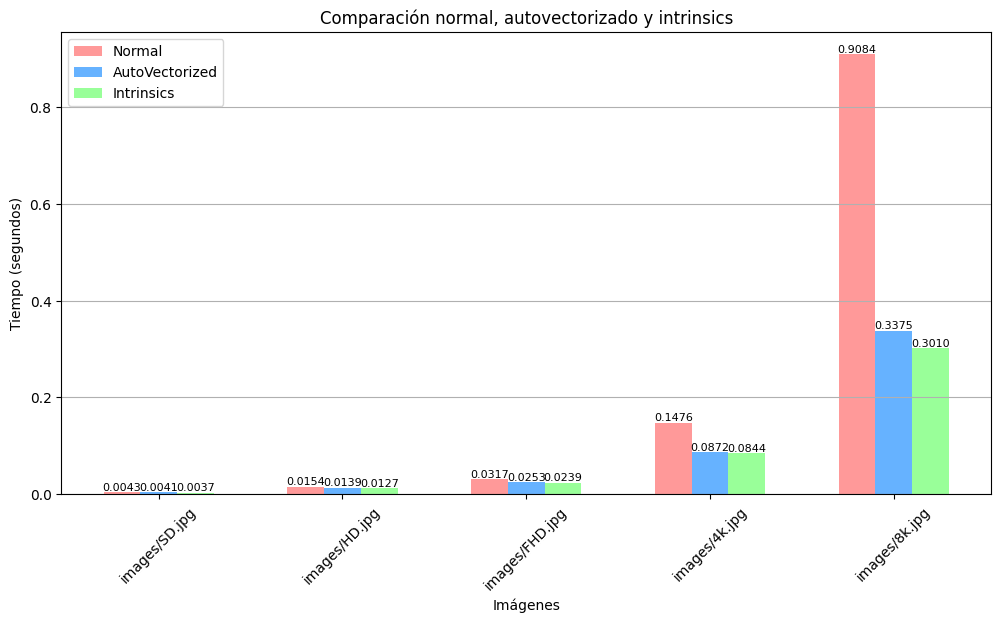

In [15]:
import subprocess
import time
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np  # Importa la biblioteca numpy

list_images = ["images/SD.jpg", "images/HD.jpg", "images/FHD.jpg", "images/4k.jpg", "images/8k.jpg"]
list_images_grey = ["images/SD_grey.jpg", "images/HD_grey.jpg", "images/FHD_grey.jpg", "images/4k_grey.jpg", "images/8k_grey.jpg"]

def ejecutar_programa(programa, imagen):
    comando = f"./{programa} {imagen}"
    try:
        resultado = subprocess.check_output(comando, shell=True, text=True)
        lineas = resultado.split('\n')
        for linea in lineas:
            if "Tiempo:" in linea:
                tiempo = float(linea.split("Tiempo:")[1].strip())
                return tiempo
    except subprocess.CalledProcessError:
        print(f"Error al ejecutar {programa} para {imagen}")
    return np.nan  # Retorna NaN en caso de error

programas = ["greyScale", "greyScale_autovectorized", "greyScale_intrinsics"]

# Usar una paleta de colores pastel
colores_pastel = ['#FF9999', '#66B2FF', '#99FF99']

# Listas para almacenar los tiempos para cada programa
tiempo_normal = []
tiempo_autovectorized = []
tiempo_intrinsics = []

# Crear un diccionario para almacenar los datos de FPS
data_fps = {"Imagen": list_images}

for imagen in list_images:
    for programa in programas:
        tiempo = 0
        for i in range(10):
            tiempo += ejecutar_programa(programa, imagen)
        tiempo /= 10
        if programa == "greyScale":
            tiempo_normal.append(tiempo)
        elif programa == "greyScale_autovectorized":
            tiempo_autovectorized.append(tiempo)
        elif programa == "greyScale_intrinsics":
            tiempo_intrinsics.append(tiempo)

# Calcular FPS a partir de los tiempos promedio
fps_normal = [1 / tiempo if not np.isnan(tiempo) else np.nan for tiempo in tiempo_normal]
fps_autovectorized = [1 / tiempo if not np.isnan(tiempo) else np.nan for tiempo in tiempo_autovectorized]
fps_intrinsics = [1 / tiempo if not np.isnan(tiempo) else np.nan for tiempo in tiempo_intrinsics]

# Agregar los FPS al diccionario de datos
data_fps["Normal"] = fps_normal
data_fps["AutoVectorized"] = fps_autovectorized
data_fps["Intrinsics"] = fps_intrinsics

# Crear un DataFrame de pandas para los datos de FPS
df_fps = pd.DataFrame(data_fps)

# Crear un único gráfico de barras
plt.figure(figsize=(12, 6))

# Coordenadas X para las barras
x = range(len(list_images))

# Ancho de las barras
bar_width = 0.2

# Dibuja las barras para cada programa con colores pastel
plt.bar(x, tiempo_normal, width=bar_width, label='Normal', color=colores_pastel[0])
plt.bar([i + bar_width for i in x], tiempo_autovectorized, width=bar_width, label='AutoVectorized', color=colores_pastel[1])
plt.bar([i + 2 * bar_width for i in x], tiempo_intrinsics, width=bar_width, label='Intrinsics', color=colores_pastel[2])

# Etiquetas de las barras
plt.xticks([i + bar_width for i in x], list_images, rotation=45)

# Mostrar el valor exacto del tiempo en cada barra
for i, v in enumerate(tiempo_normal):
    plt.text(i, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)
for i, v in enumerate(tiempo_autovectorized):
    plt.text(i + bar_width, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)
for i, v in enumerate(tiempo_intrinsics):
    plt.text(i + 2 * bar_width, v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

# Configuración de ejes y leyenda
plt.xlabel("Imágenes")
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación normal, autovectorizado y intrinsics")
plt.legend()
plt.grid(True, axis='y')

# Mostrar el gráfico
plt.show()




In [16]:
# Mostrar la tabla de FPS
print("Tabla de FPS:")
df_fps.to_csv("fps.csv", index=False)

Tabla de FPS:


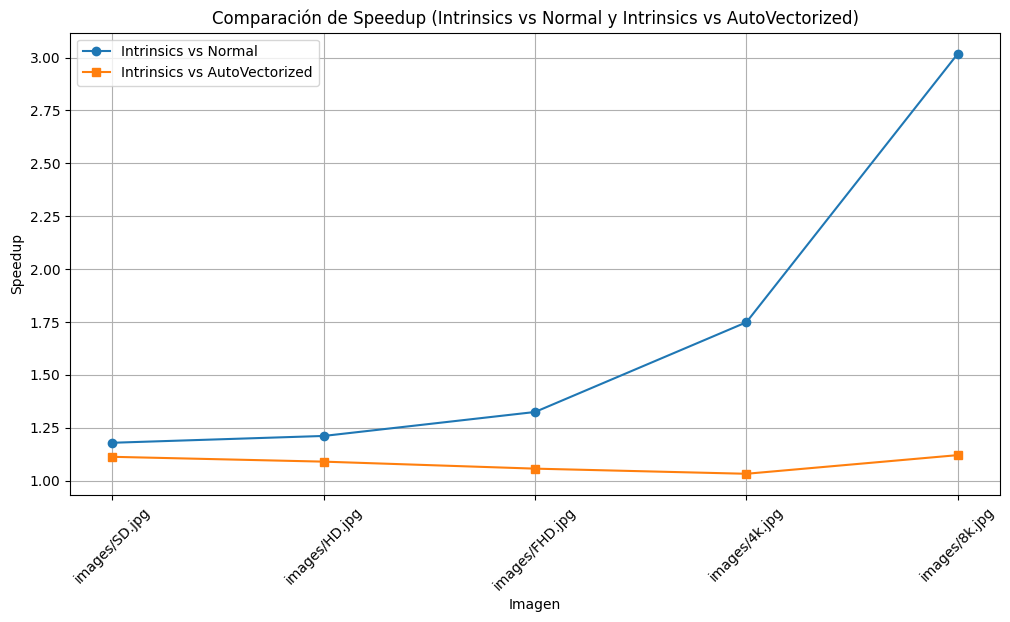

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que ya tienes las listas de tiempos como tiempo_normal, tiempo_autovectorized, tiempo_intrinsics

# Calcular el speedup para Intrinsics vs Normal
speedup_intrinsics_vs_normal = [tiempo_normal[i] / tiempo_intrinsics[i] for i in range(len(list_images))]

# Calcular el speedup para Intrinsics vs AutoVectorized
speedup_intrinsics_vs_autovectorized = [tiempo_autovectorized[i] / tiempo_intrinsics[i] for i in range(len(list_images))]

# Crear un arreglo de índices para el eje x (las imágenes)
x = np.arange(len(list_images))

# Crear el gráfico de líneas para Speedup Intrinsics vs Normal y Intrinsics vs AutoVectorized
plt.figure(figsize=(12, 6))
plt.plot(x, speedup_intrinsics_vs_normal, label='Intrinsics vs Normal', marker='o')
plt.plot(x, speedup_intrinsics_vs_autovectorized, label='Intrinsics vs AutoVectorized', marker='s')
plt.xlabel("Imagen")
plt.ylabel("Speedup")
plt.title("Comparación de Speedup (Intrinsics vs Normal y Intrinsics vs AutoVectorized)")
plt.xticks(x, list_images, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [18]:
print(speedup_intrinsics_vs_normal)
print(speedup_intrinsics_vs_autovectorized)

[1.1793573461791111, 1.211590667663375, 1.3248313271165726, 1.7488182196127577, 3.0176826112463138]
[1.1130391942194002, 1.0902073415430615, 1.057118581641024, 1.0328446706471928, 1.1209941726776915]
